# Preprocessing


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt             
%matplotlib inline     
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df= pd.read_csv('/content/dataset_f.csv')
df.head()

,Unnamed: 0,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,1,STUDENT1,2,2,3,3,1,2,2,1,...,1,1,3,2,1,2,1,1,1,1
1,2,STUDENT2,2,2,3,3,1,2,2,1,...,1,1,3,2,3,2,2,3,1,1
2,3,STUDENT3,2,2,2,3,2,2,2,2,...,1,1,2,2,1,1,2,2,1,1
3,4,STUDENT4,1,1,1,3,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,5,STUDENT5,2,2,1,3,2,2,1,3,...,2,1,2,2,2,1,2,2,1,1


In [3]:
# Drop first column of dataframe using iloc[]
df2 = df.iloc[: , 1:]
# print(df2)

# select all columns
# except the first column
df2 = df[df.columns[1:]]
df2.head()

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [4]:
df2.describe()

,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,Accommodation type,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       145 non-null    object
 1   Age                      145 non-null    int64 
 2   Gender                   145 non-null    int64 
 3   HS Type                  145 non-null    int64 
 4   Scholarship Type         145 non-null    int64 
 5   Working                  145 non-null    int64 
 6   Extra-curricular         145 non-null    int64 
 7   Romantic relationship    145 non-null    int64 
 8   Salary                   145 non-null    int64 
 9   Transpotation mode       145 non-null    int64 
 10  Accommodation type       145 non-null    int64 
 11  Mother_edu               145 non-null    int64 
 12  Father_edu               145 non-null    int64 
 13  Siblings                 145 non-null    int64 
 14  Parental_status          145 non-null    i

In [6]:
df2.shape

(145, 33)

In [7]:
sum(df2.duplicated())

0

No Duplicates


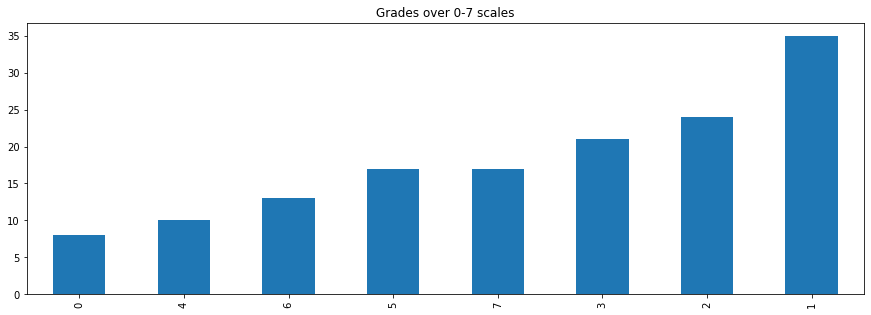

In [8]:
df2['Grade'].value_counts().sort_values().plot(kind="bar", title="Grades over 0-7 scales", figsize=(15,5))
plt.show()

In [9]:
df2.loc[df2['Grade']<3]

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,STUDENT137,1,1,2,3,1,1,1,1,2,...,3,1,3,2,2,1,2,2,9,0
137,STUDENT138,1,1,1,5,2,1,2,1,1,...,1,1,3,1,3,1,2,4,9,2
138,STUDENT139,1,1,2,4,1,1,1,5,2,...,2,1,3,2,3,1,1,3,9,0
139,STUDENT140,1,1,2,4,1,2,1,2,2,...,2,1,2,3,2,1,1,2,9,0


In [10]:
df2["Grade_categorized"] = 1
df2.loc[df2["Grade"] < 3, "Grade_categorized"] = 0
# df2["Grade_categorized"] = 1

# df2.loc[df2["Grade"] == 0, "Grade_categorized"] = 1
# df2.loc[df2["Grade"] ==1, "Grade_categorized"] = 2
# df2.loc[df2["Grade"] ==2, "Grade_categorized"] = 2
# df2.loc[df2["Grade"] ==3, "Grade_categorized"] =3
# df2.loc[df2["Grade"] ==4, "Grade_categorized"] =3
# df2.loc[df2["Grade"] ==5, "Grade_categorized"] = 4
# df2.loc[df2["Grade"] ==6, "Grade_categorized"] = 4
# df2.loc[df2["Grade"] ==7, "Grade_categorized"] = 5
df2

,ID,Age,Gender,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,...,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Course ID,Grade,Grade_categorized
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,3,2,1,2,1,1,1,1,0
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,3,2,3,2,2,3,1,1,0
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,2,2,1,1,2,2,1,1,0
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,2,3,2,2,1,3,2,1,1,0
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,1,2,2,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,2,1,2,1,3,3,9,5,1
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,3,2,2,1,5,3,9,5,1
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,3,3,2,1,4,3,9,1,0
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,1,2,1,2,1,5,3,9,4,1


In [11]:
df2=df2.drop(["ID","Grade","Gender","Age","Course ID"],axis = 1)
df2

,HS Type,Scholarship Type,Working,Extra-curricular,Romantic relationship,Salary,Transpotation mode,Accommodation type,Mother_edu,Father_edu,...,Attendance,Preparation method,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Grade_categorized
0,3,3,1,2,2,1,1,1,1,2,...,1,1,1,3,2,1,2,1,1,0
1,3,3,1,2,2,1,1,1,2,3,...,1,1,1,3,2,3,2,2,3,0
2,2,3,2,2,2,2,4,2,2,2,...,1,1,1,2,2,1,1,2,2,0
3,1,3,1,2,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,0
4,1,3,2,2,1,3,1,4,3,3,...,1,2,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,3,1,1,2,1,1,2,1,2,...,1,1,1,2,1,2,1,3,3,1
141,2,4,2,2,2,1,4,2,1,1,...,2,1,1,3,2,2,1,5,3,1
142,1,4,2,2,2,1,1,1,3,4,...,1,1,1,3,3,2,1,4,3,0
143,2,4,1,1,1,5,2,3,4,4,...,1,2,1,2,1,2,1,5,3,1


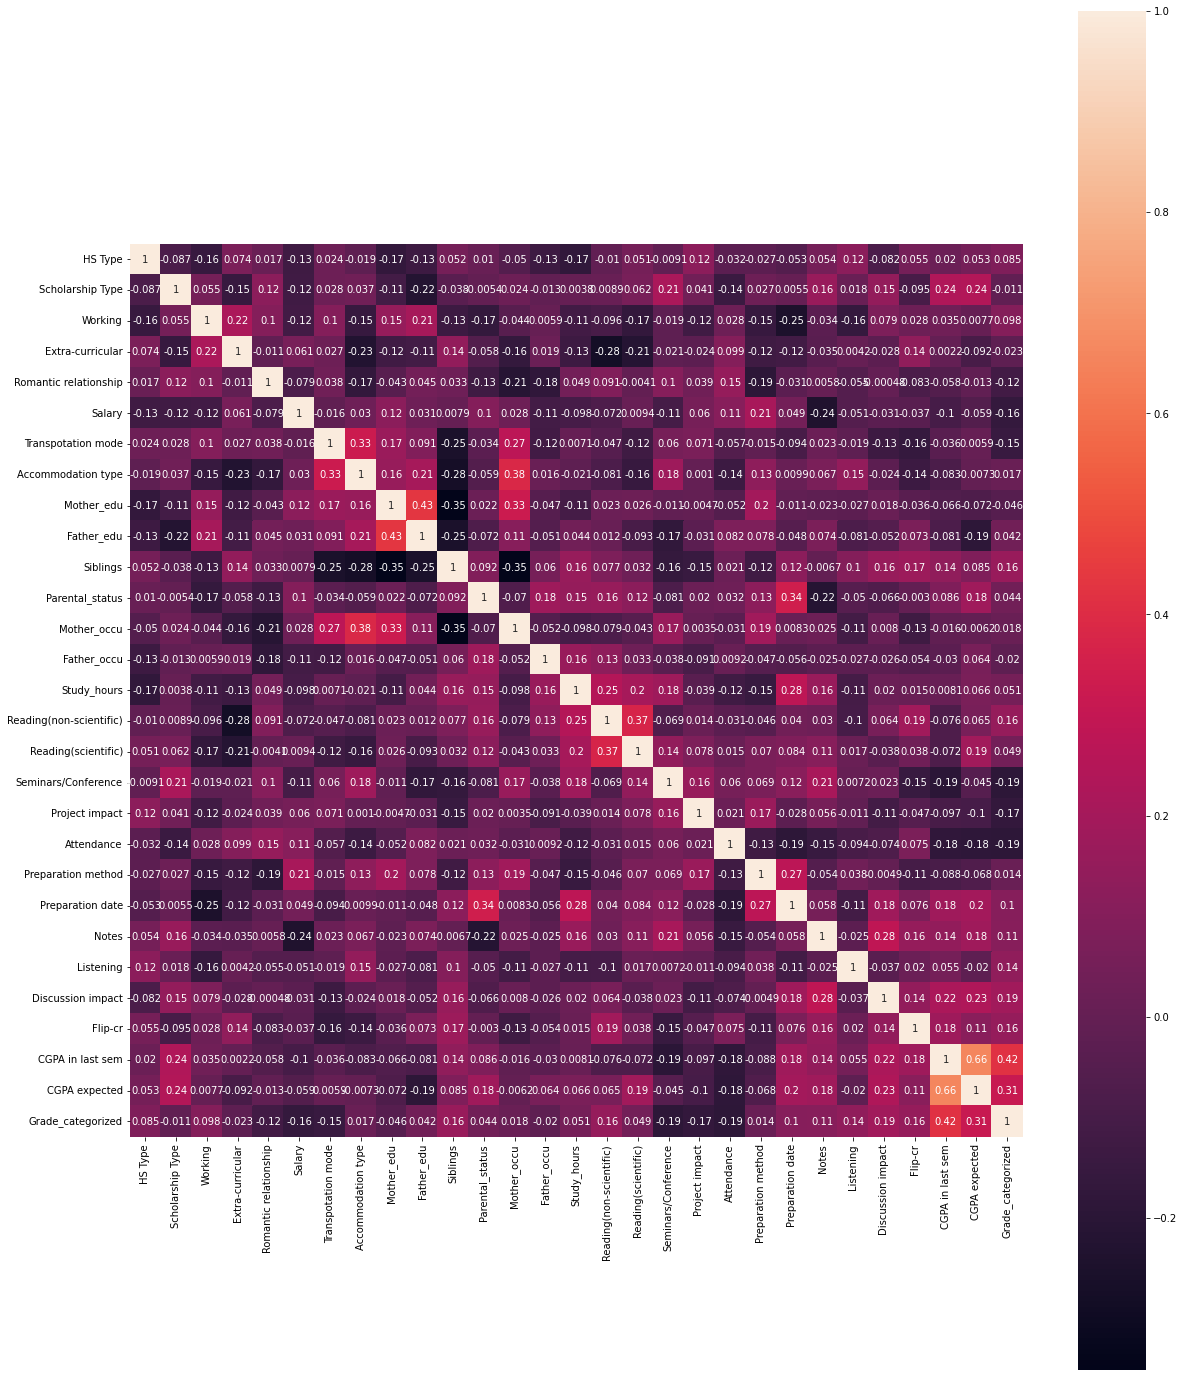

In [12]:
corr= df2.corr()
fig,ax= plt.subplots(figsize=(20,25))
sns.heatmap(corr,annot=True, square=True,ax=ax)
plt.yticks(rotation=360)
plt.show()

In [13]:
df2 = df2.drop(['Scholarship Type', 'Extra-curricular', 'Accommodation type', 'Mother_edu', 'Father_edu', 'Parental_status', 'Mother_occu', 'Father_occu', 'Study_hours', 'Reading(scientific)', 'Preparation method'],axis= 1)

In [14]:
df2 = df2.drop(['HS Type'],axis = 1) 

In [15]:
df2

,Working,Romantic relationship,Salary,Transpotation mode,Siblings,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Grade_categorized
0,1,2,1,1,3,2,1,1,1,1,3,2,1,2,1,1,0
1,1,2,1,1,2,2,1,1,1,1,3,2,3,2,2,3,0
2,2,2,2,4,2,1,1,1,1,1,2,2,1,1,2,2,0
3,1,1,2,1,5,1,1,1,1,2,3,2,2,1,3,2,0
4,2,1,3,1,2,1,1,1,1,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,1,2,3,1,1,1,1,2,1,2,1,3,3,1
141,2,2,1,4,5,2,2,1,2,1,3,2,2,1,5,3,1
142,2,2,1,1,4,2,1,1,1,1,3,3,2,1,4,3,0
143,1,1,5,2,1,2,1,1,1,1,2,1,2,1,5,3,1


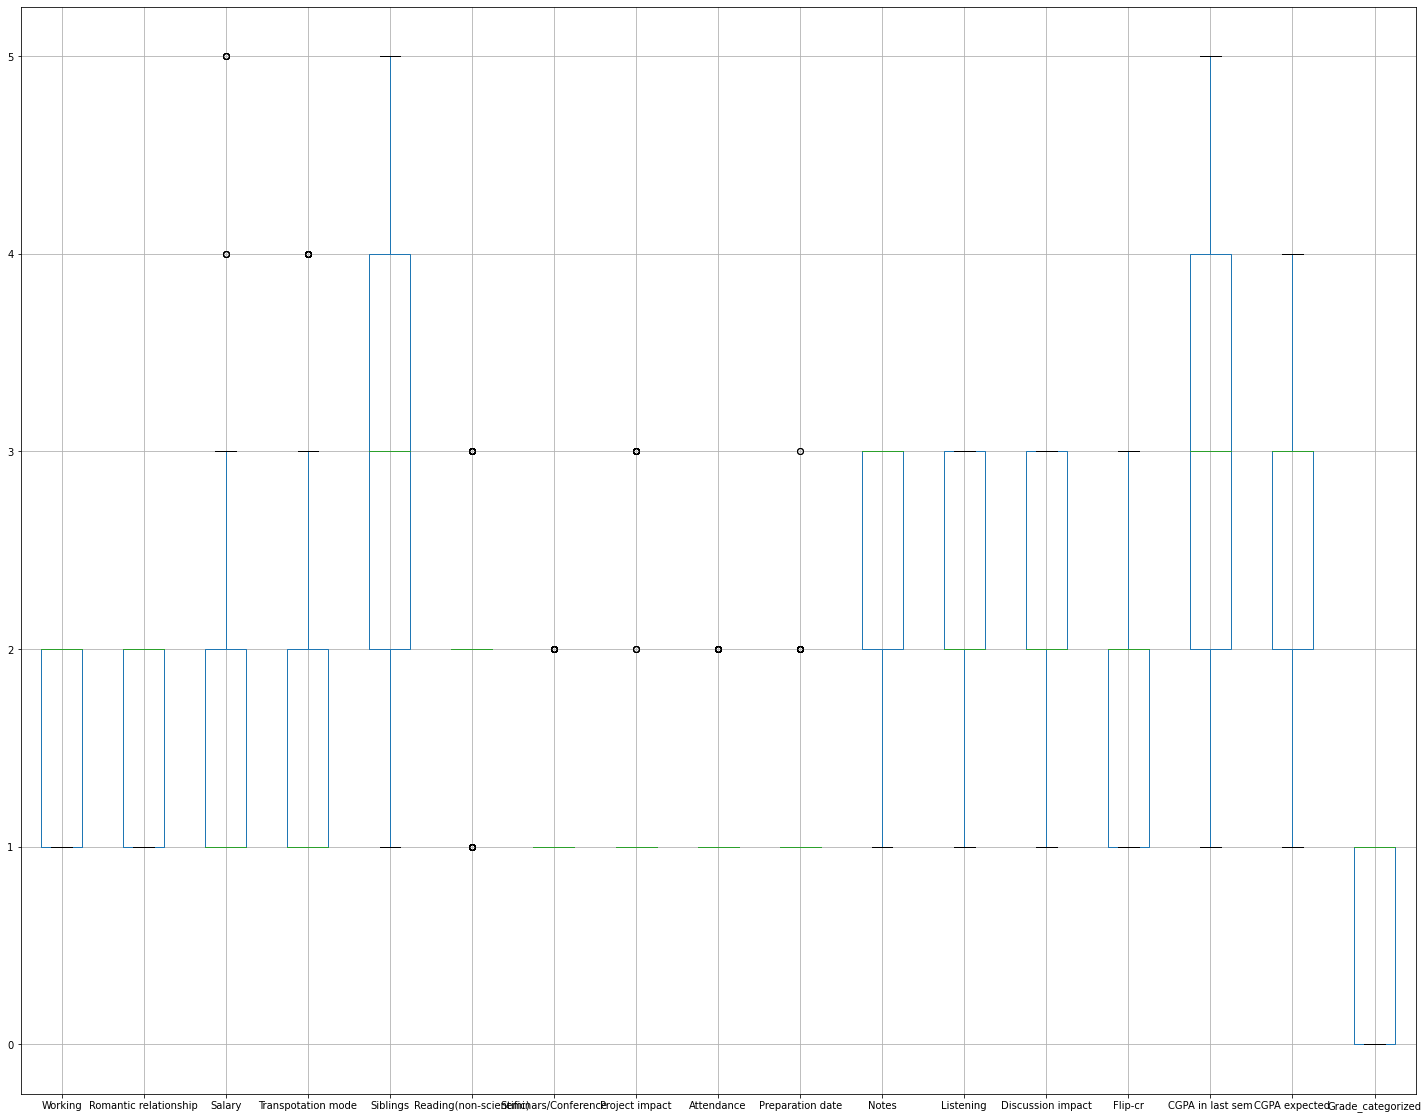

In [16]:
df2.boxplot(figsize=(25,20))

# Clustering

In [17]:
data=df2.copy()
data.drop(['Grade_categorized'],axis=1,inplace=True)

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

In [19]:
data


,Working,Romantic relationship,Salary,Transpotation mode,Siblings,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected
0,1,2,1,1,3,2,1,1,1,1,3,2,1,2,1,1
1,1,2,1,1,2,2,1,1,1,1,3,2,3,2,2,3
2,2,2,2,4,2,1,1,1,1,1,2,2,1,1,2,2
3,1,1,2,1,5,1,1,1,1,2,3,2,2,1,3,2
4,2,1,3,1,2,1,1,1,1,1,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,1,2,3,1,1,1,1,2,1,2,1,3,3
141,2,2,1,4,5,2,2,1,2,1,3,2,2,1,5,3
142,2,2,1,1,4,2,1,1,1,1,3,3,2,1,4,3
143,1,1,5,2,1,2,1,1,1,1,2,1,2,1,5,3


In [20]:
data.drop(["Siblings","Preparation date","Romantic relationship"],axis=1,inplace=True)

Elbow Plot

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=data.copy()
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x=3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

K Means


In [22]:
import plotly.express as px

kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=data.columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

In [23]:

pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['blue','red','green'])

Cluster Prediction

In [24]:
c1=clusters[clusters['label']==0]
c2=clusters[clusters['label']==1]
c3=clusters[clusters['label']==2]

In [25]:
c1

,Working,Salary,Transpotation mode,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,label
0,1,1,1,2,1,1,1,3,2,1,2,1,1,0
1,1,1,1,2,1,1,1,3,2,3,2,2,3,0
3,1,2,1,1,1,1,1,3,2,2,1,3,2,0
4,2,3,1,1,1,1,1,2,2,2,1,2,2,0
7,1,2,2,2,1,1,1,3,2,2,1,1,1,0
10,2,3,2,1,1,1,2,2,2,2,2,1,1,0
15,2,1,1,2,2,3,2,3,2,2,3,2,2,0
17,2,1,1,2,2,1,2,2,2,2,2,2,2,0
19,2,2,2,2,1,2,1,3,2,2,3,2,3,0
25,2,1,1,2,1,1,1,2,1,3,2,1,2,0


In [26]:
c2

,Working,Salary,Transpotation mode,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,label
5,2,2,1,1,1,1,1,1,2,1,2,4,4,1
6,2,1,1,2,2,1,2,3,3,3,3,4,4,1
8,2,1,1,2,1,1,1,3,2,2,2,4,3,1
11,1,4,2,3,1,3,1,3,1,3,3,4,3,1
12,2,1,1,2,1,1,1,2,2,2,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,1,1,1,2,1,1,3,3,3,2,5,3,1
140,1,1,1,3,1,1,1,2,1,2,1,3,3,1
142,2,1,1,2,1,1,1,3,3,2,1,4,3,1
143,1,5,2,2,1,1,1,2,1,2,1,5,3,1


In [27]:
c3

,Working,Salary,Transpotation mode,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,label
2,2,2,4,1,1,1,1,2,2,1,1,2,2,2
9,2,3,4,2,1,1,2,2,2,2,2,1,2,2
14,1,3,4,2,1,1,1,2,3,2,1,4,4,2
20,1,1,4,2,2,1,1,3,1,2,3,4,4,2
21,2,1,4,2,1,1,1,3,1,3,3,3,3,2
28,2,1,4,2,1,1,1,3,2,3,3,5,4,2
29,2,1,4,2,1,1,1,3,2,2,2,4,3,2
42,2,1,4,2,1,1,1,2,1,3,1,2,3,2
49,2,2,4,2,1,1,1,2,2,2,1,3,2,2
54,2,3,4,1,1,1,1,3,1,3,1,5,3,2


In [28]:
c3["Working"].value_counts()

2    18
1     4
Name: Working, dtype: int64

In [29]:
clusters.to_csv('cluster.csv',index=False)

In [30]:
import pickle
output = open('pickledmodel2.pkl', 'wb')
pickle.dump(kmeans,output)



In [31]:
from google.colab import files
# files.download('pickledmodel2.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
filename='/content/pickledmodel2.pkl'
infile= open(filename,'rb')
model= pickle.load(infile)
# infile.close()


print(model.predict(X_test))

EOFError: ignored

# Classification

So, what he have in our menu?

For appetizers, we have a Logistic Regression, Decision Tree Classifer and Support Vector Classifier.

For the main course, you can choose between:
Random Forest Classifier.
AdaBoost Classifier.
Gradient Boosting Classifier.
And finally for deserts, we have either KNN or Gussian Naive Bayes

In [34]:
df3= df2.copy()
df3

,Working,Romantic relationship,Salary,Transpotation mode,Siblings,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Preparation date,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected,Grade_categorized
0,1,2,1,1,3,2,1,1,1,1,3,2,1,2,1,1,0
1,1,2,1,1,2,2,1,1,1,1,3,2,3,2,2,3,0
2,2,2,2,4,2,1,1,1,1,1,2,2,1,1,2,2,0
3,1,1,2,1,5,1,1,1,1,2,3,2,2,1,3,2,0
4,2,1,3,1,2,1,1,1,1,1,2,2,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,1,2,1,1,2,3,1,1,1,1,2,1,2,1,3,3,1
141,2,2,1,4,5,2,2,1,2,1,3,2,2,1,5,3,1
142,2,2,1,1,4,2,1,1,1,1,3,3,2,1,4,3,0
143,1,1,5,2,1,2,1,1,1,1,2,1,2,1,5,3,1


In [35]:
x, y = df3.iloc[:, :-1], df3.iloc[:, -1]

In [36]:
x=x.drop(["Siblings","Preparation date","Romantic relationship"],axis=1)

In [37]:
y

0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    1
142    0
143    1
144    1
Name: Grade_categorized, Length: 145, dtype: int64

In [80]:
x.columns

Index(['Working', 'Salary', 'Transpotation mode', 'Reading(non-scientific)',
       'Seminars/Conference', 'Project impact', 'Attendance', 'Notes',
       'Listening', 'Discussion impact', 'Flip-cr', 'CGPA in last sem',
       'CGPA expected'],
      dtype='object')

In [82]:
feature_name=['Working', 'Salary', 'Transpotation mode', 'Reading(non-scientific)',
       'Seminars/Conference', 'Project impact', 'Attendance', 'Notes',
       'Listening', 'Discussion impact', 'Flip-cr', 'CGPA in last sem',
       'CGPA expected']

In [83]:
target_name=['Grade']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=545)

In [90]:
clf=RandomForestClassifier(n_estimators=100,max_depth=2, min_samples_split=5, min_samples_leaf=5)
# clf.predict()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.7045454545454546


In [91]:
estimator = clf.estimators_[5]


In [99]:
clf.estimators_[5]

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=5,
                       min_samples_split=5, random_state=444448787)

In [104]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = feature_name,
                class_names = ['0','1'],
                rounded = True,  filled = True)

In [105]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

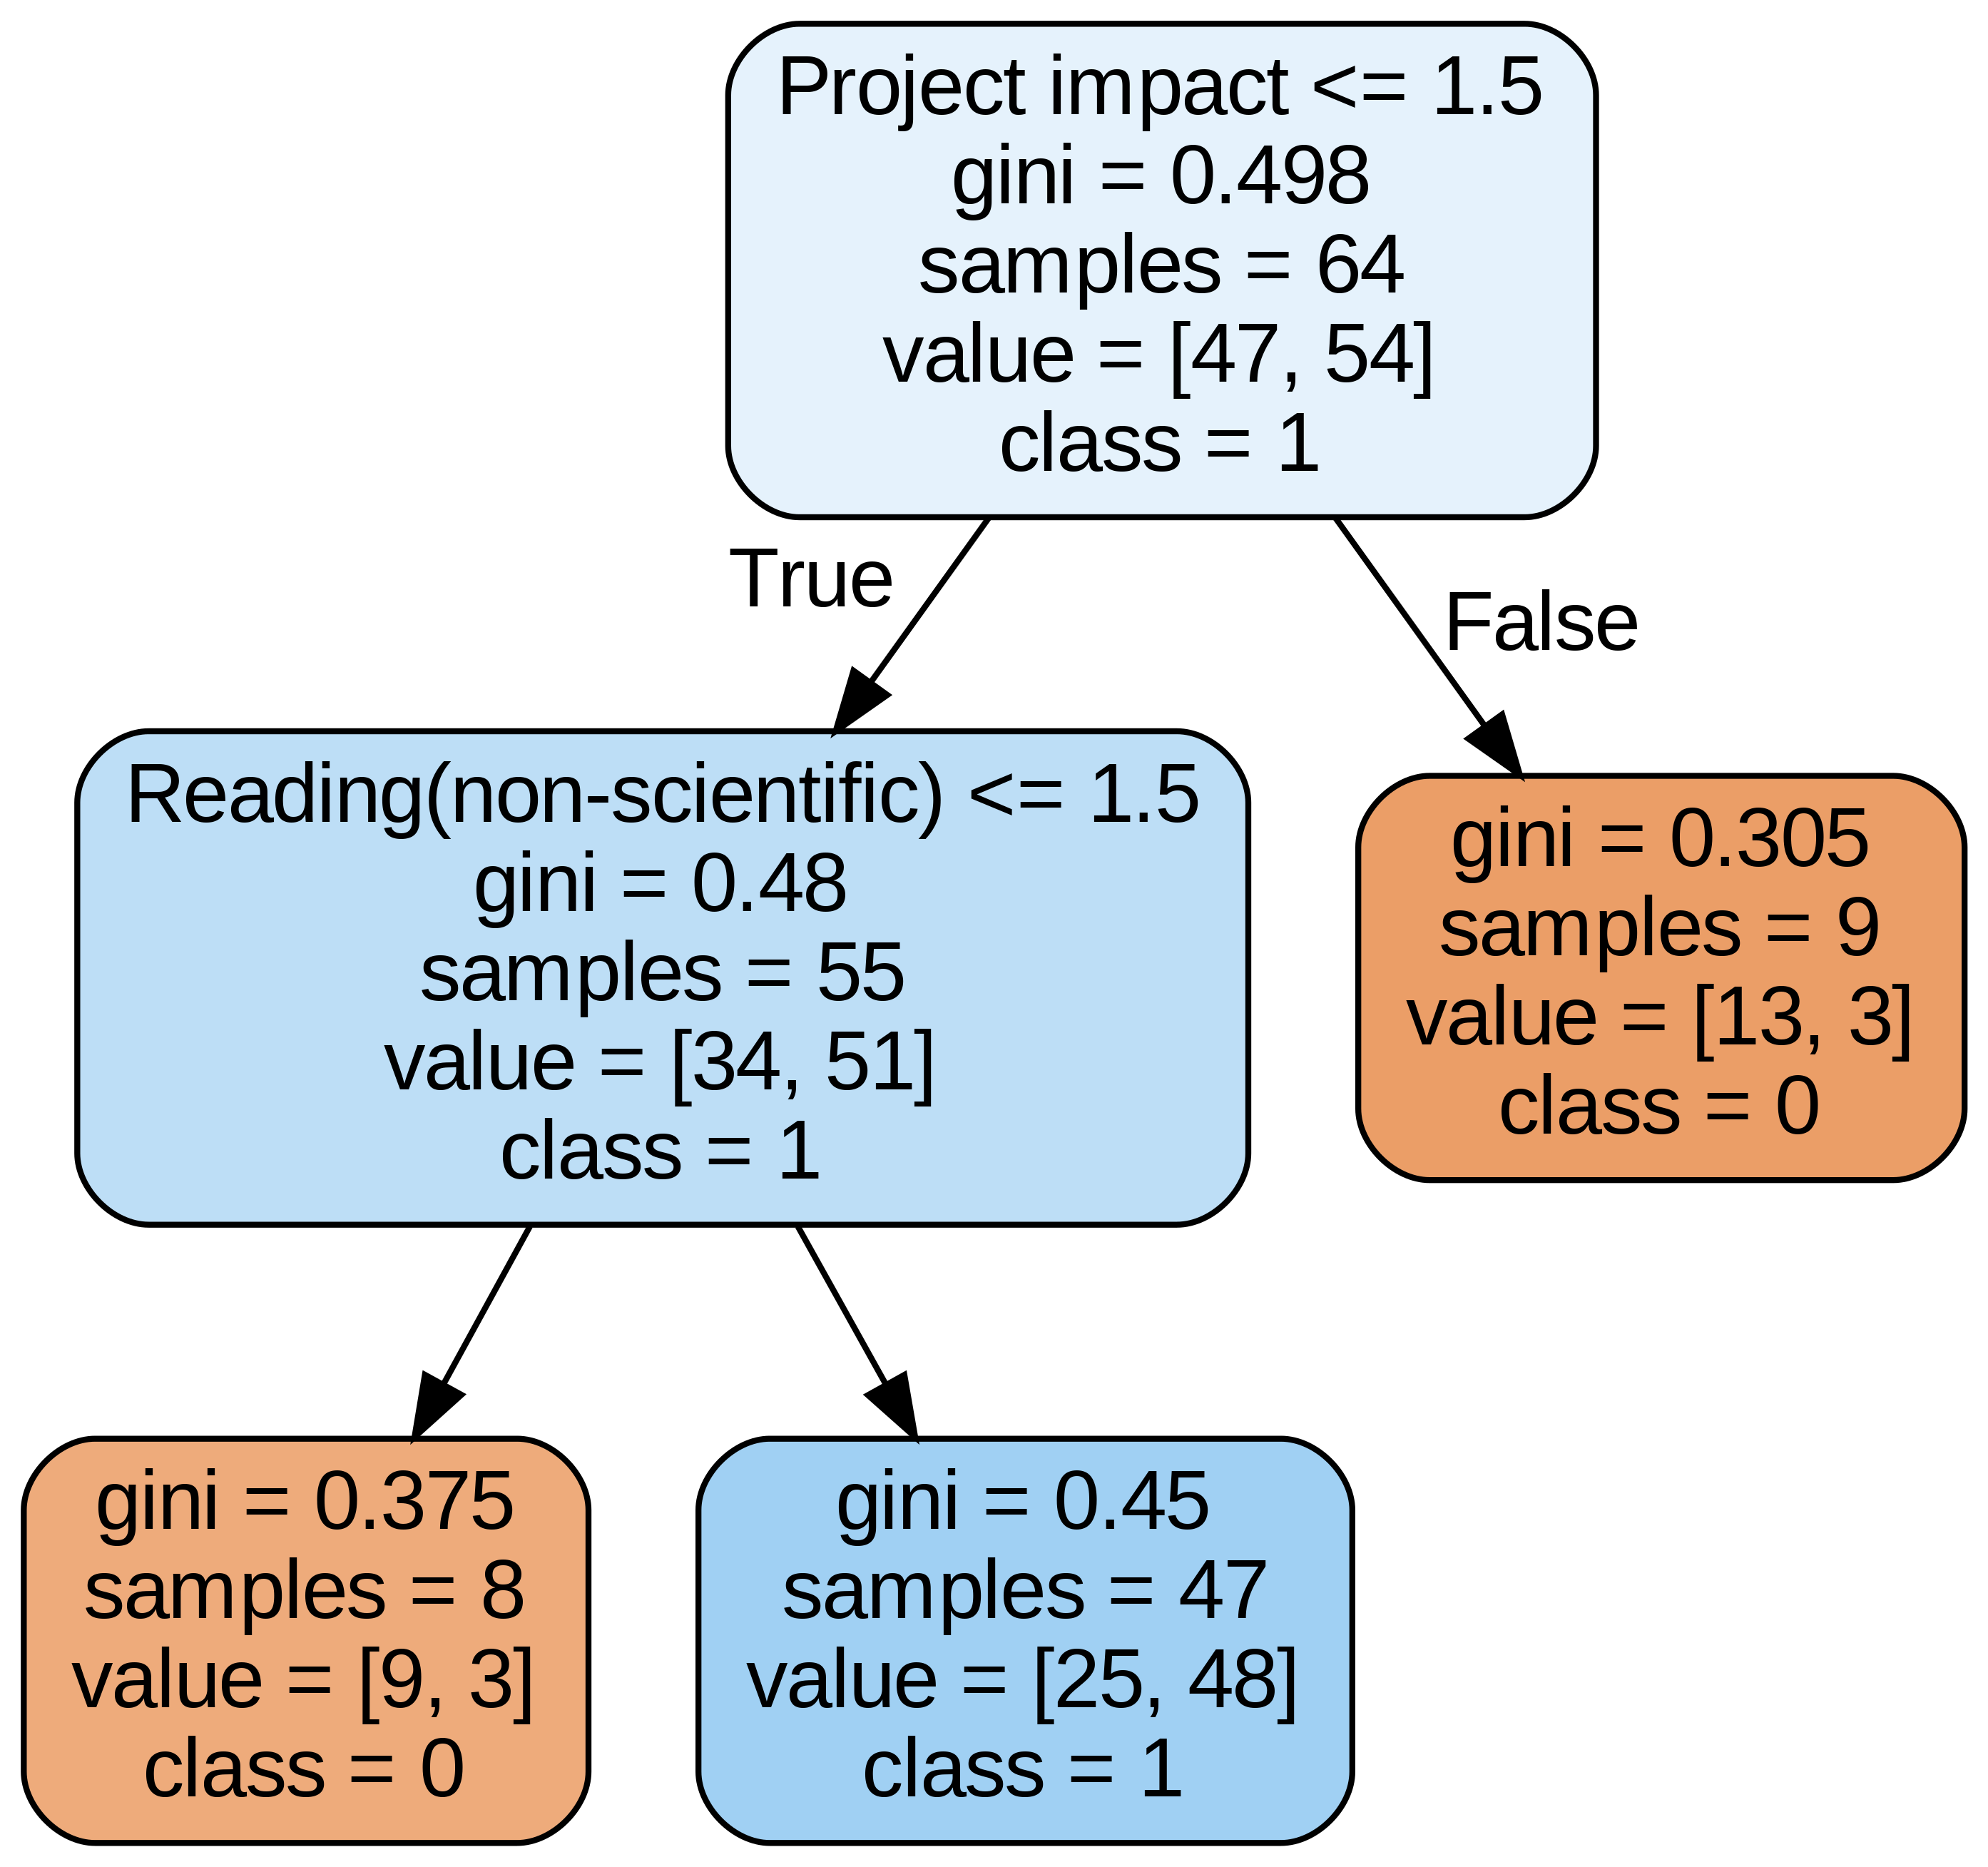

In [106]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [41]:
import pickle
output = open('pickledmodel1.pkl', 'wb')
pickle.dump(clf,output)
from google.colab import files
files.download('pickledmodel1.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
filename='/content/pickledmodel1.pkl'
infile= open(filename,'rb')
model= pickle.load(infile)
# infile.close()

print(model.predict(X_test))

[0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 1]


In [43]:
X_test.head()

,Working,Salary,Transpotation mode,Reading(non-scientific),Seminars/Conference,Project impact,Attendance,Notes,Listening,Discussion impact,Flip-cr,CGPA in last sem,CGPA expected
64,2,1,1,2,1,3,1,3,2,3,1,4,3
140,1,1,1,3,1,1,1,2,1,2,1,3,3
77,2,2,2,2,2,1,2,2,2,2,2,1,1
55,1,4,1,2,1,1,1,1,3,3,3,5,4
10,2,3,2,1,1,1,2,2,2,2,2,1,1


In [44]:
print(model.predict([[2,1,1,2,1,3,1,3,2,3,1,4,3]]))

[0]


In [45]:
from sklearn.model_selection import StratifiedKFold
Kfold = StratifiedKFold(n_splits=5)

In [46]:
RANDOM_STATE = 545
classifiers = [LogisticRegression(max_iter=70, random_state=RANDOM_STATE),
               DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE),
               SVC(C=3, kernel='linear', random_state=RANDOM_STATE),
               RandomForestClassifier(
                   max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=RANDOM_STATE),
               AdaBoostClassifier(DecisionTreeClassifier(
                   max_depth=2, random_state=RANDOM_STATE), random_state=RANDOM_STATE),
               GradientBoostingClassifier(
                   learning_rate=0.005, n_estimators=30, random_state=RANDOM_STATE),
               KNeighborsClassifier(),
               GaussianNB(var_smoothing=1e-2),
              LogisticRegression(solver='liblinear')
               ]

In [47]:
classifiers_names = ['Logistic Regression',
                     'Decision Tree Classifier',
                     'Support Vector Machine',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'K Neighbors Classifier',
                     'Gaussian Naive Bayes',
                     'Log reg liblinear'
                     ]


In [48]:
def cv_fit_models():
    i=0
    train_acc_results = []
    cv_scores = {classifier_name: [] for classifier_name in classifiers_names}
    for classifier_name in classifiers_names:
        cv_score = cross_validate(classifiers[i],
                                  X_train,
                                  y_train,
                                  scoring=scoring,
                                  cv=Kfold,
                                  return_train_score=True,
                                  return_estimator=True)

        train_accuracy = cv_score['train_acc'].mean() * 100
        
        train_acc_results.append(train_accuracy)
        cv_scores[classifier_name].append(cv_score)
        i+=1
    return np.array(train_acc_results), cv_scores

In [49]:
scoring = {'acc': 'accuracy'}

results, folds_scores = cv_fit_models()

In [50]:
def pick_best_estimator():
    best_estimators = {classifier_name: [] for classifier_name in classifiers_names}
    for key, model in folds_scores.items():
        best_acc_idx = np.argmax(model[0]['test_acc'])
        best_model = model[0]['estimator'][best_acc_idx]
        best_estimators[key].append(best_model)
    return best_estimators

In [51]:
best_estimators = pick_best_estimator()

In [52]:
best_estimators.values()

dict_values([[LogisticRegression(max_iter=70, random_state=545)], [DecisionTreeClassifier(max_depth=2, random_state=545)], [SVC(C=3, kernel='linear', random_state=545)], [RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=545)], [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=545),
                   random_state=545)], [GradientBoostingClassifier(learning_rate=0.005, n_estimators=30,
                           random_state=545)], [KNeighborsClassifier()], [GaussianNB(var_smoothing=0.01)], [LogisticRegression(solver='liblinear')]])

In [60]:

test_accs, precisions, recalls = [], [], []
for estimator_val in best_estimators.values():
  estimator = estimator_val[0]
  y_pred = estimator.predict(X_test)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  score = estimator.score(X_test, y_test)

  test_accs.append(score)
  precisions.append(precision)
  recalls.append(recall)
        
  scores = {'test_acc': np.array(test_accs),
              'precision': np.array(precisions),
              'recall': np.array(recalls)}

print(scores)

{'test_acc': array([0.70454545, 0.68181818, 0.75      , 0.72727273, 0.61363636,
       0.61363636, 0.75      , 0.65909091, 0.68181818]), 'precision': array([0.7469697 , 0.68181818, 0.77582645, 0.72727273, 0.67045455,
       0.61800699, 0.7625    , 0.67272727, 0.73311005]), 'recall': array([0.70454545, 0.68181818, 0.75      , 0.72727273, 0.61363636,
       0.61363636, 0.75      , 0.65909091, 0.68181818])}


In [56]:
def plot_train_test_accuracy(df):
    _, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
    sns.barplot(data=df, x='train_accuracy',
                y='Model', orient='h', ax=ax[0])
    ax[0].set_xlim([0, 100])
    sns.barplot(data=df, x='test_accuracy',
                y='Model', orient='h', ax=ax[1])
    ax[1].set_xlim([0, 100])

In [57]:
results_df = pd.DataFrame({'Model': classifiers_names,
                           'train_accuracy': results,
                           'test_accuracy': scores['test_acc'] * 100,
                           'test_precision': scores['precision'] * 100,
                           'test_recall': scores['recall'] * 100})

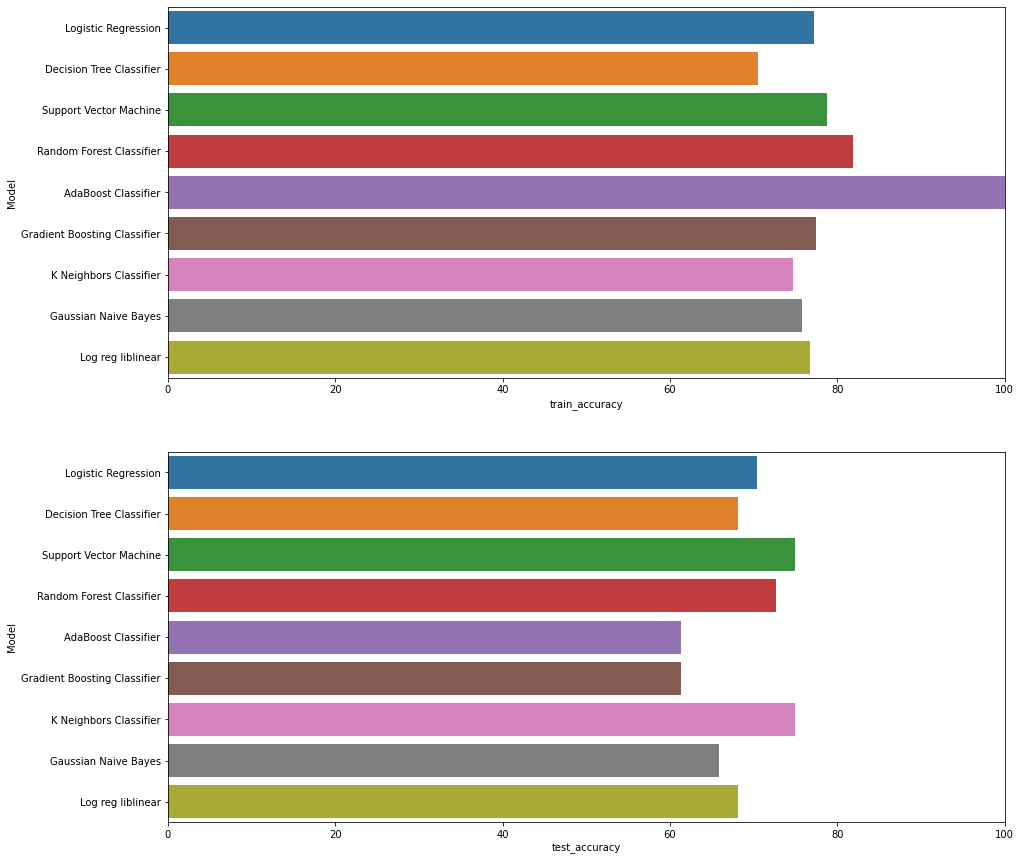

In [58]:
plot_train_test_accuracy(results_df)

In [61]:
estimator.predict(X_test)

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [67]:
for estimator_val in best_estimators.values():
  estimator = estimator_val[0]
  y_pred = estimator.predict(X_test)

print(y_pred)

[1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 1]


In [73]:
li=[]
li=best_estimators.values()
li[0]

TypeError: ignored

In [68]:
[[tuple(l.split()[-2:]) for l in list] for list in best_estimators.values()]


AttributeError: ignored